# Report

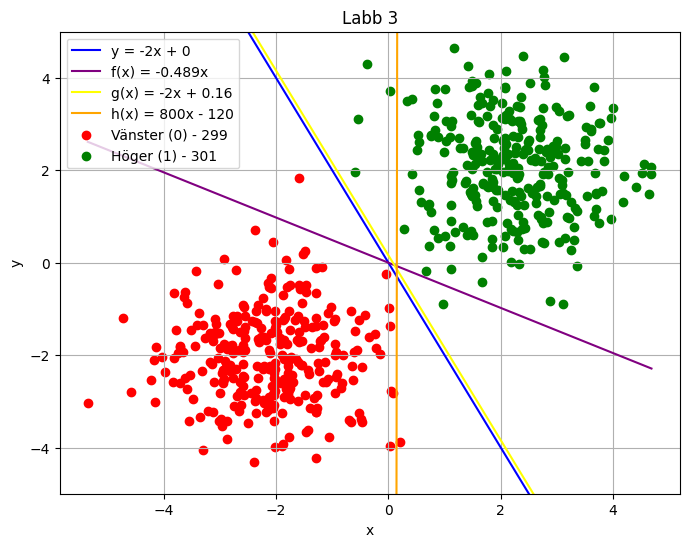

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def point_side(x_point, y_point, k, m):
    x1, y1 = 0, m
    x2, y2 = 1, k*1 + m

    cross = (x2 - x1) * (y_point - y1) - (y2 - y1) * (x_point - x1)

    if cross > 0:
        return 1
    else:
        return 0
    
unlabelled = "C:/Users/samue/Documents/code/python-programmering-Samuel-Airisniemi/python-programmering-Samuel-Airisniemi/Labs/Labb3/unlabelled_data (1).csv"
labelled = "C:/Users/samue/Documents/code/python-programmering-Samuel-Airisniemi/python-programmering-Samuel-Airisniemi/Labs/Labb3/labelled_data.csv"

x, y = [], []

with open(unlabelled, "r") as f_read:
    for line in f_read:
        parts = line.strip().split(",")
        if len(parts) == 2:
            x_val, y_val = map(float, parts)
            x.append(x_val)
            y.append(y_val)

k = -2
m = 0
count_0 = 0
count_1 = 0

with open(labelled, "w") as f_write:
    for x_point, y_point in zip(x, y):
        side = point_side(x_point, y_point, k, m)
        if side == 0:
            count_0 += 1
        else:
            count_1 +=1
        f_write.write(f"({x_point:.1f}, {y_point:.1f}), {side}\n")

x_line = np.linspace(min(x), max(x))
y_line = k * x_line + m

f_line = -0.489 * x_line #VG
g_line = -2 * x_line + 0.16 #VG
h_line = 800 * x_line - 120 #VG

x_left = [xi for xi, yi in zip(x, y) if point_side(xi, yi, k, m) == 0]
y_left = [yi for xi, yi in zip(x, y) if point_side(xi, yi, k, m) == 0]
x_right = [xi for xi, yi in zip(x, y) if point_side(xi, yi, k, m) == 1]
y_right = [yi for xi, yi in zip(x, y) if point_side(xi, yi, k, m) == 1]

plt.figure(figsize=(8, 6))
plt.plot(x_line, y_line, label = (f"y = {k}x + {m}"), color = "blue")
plt.plot(x_line, f_line, label = "f(x) = -0.489x", color = "purple") #VG
plt.plot(x_line, g_line, label = "g(x) = -2x + 0.16", color = "yellow") #VG
plt.plot(x_line, h_line, label = "h(x) = 800x - 120", color = "orange") #VG
plt.scatter(x_left, y_left, color = "red", label = (f"Vänster (0) - {count_0}"))
plt.scatter(x_right, y_right, color = "green", label = (f"Höger (1) - {count_1}"))
plt.title("Labb 3")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-5,5)
plt.grid()
plt.legend()
plt.show()

Klassificeringen bygger på funktionen "point_side" som avgör vilken sida en punkt ligger på i förållande till linjen. Vilket gör att valet av linje har en direkt påverkan av hur punkterna delas upp. 

Linjen f(x) = -0.489x delar upp punkterna diagonalt vilket hade gjort resultatet mer balanserat om datan hade varit mer utspridd över hela diagrammet. Med denna linjen blir föredlningen: 299 till vänster och 301 till höger.

Linjen g(x) = -2x + 0.16 är väldigt lik den linjen jag själv skapade (y = -2x) och skär nästan y-axeln vid origo. Den har en mycket brantare lutning än föregående linje och punkter som ligger nära x-axeln kan hamna på olika sidor om de har små x-värden. Med denna linje blir fördelningen: 299 till vänster och 301 till höger.

Linjen h(x) = 800x - 120  har en positiv lutning och är extremt brant, vilket gör linjen nästan vertikal. Detta ändrar klassificeringen av punkter ganska mycket eftersom dom blir mer uppdelade till vänster/höger och blir svåra att klassificera som ovan/under. Fördelningen med denna linje blir: 298 till vänster och 302 till höger.

Resultatet av hur punkterna blir uppdelade är väldigt lika varandra med den data som finns. Men valet av linje har stor påverkan i klassificeringen av punkter beroende på hur man vill mäta punkterna. Vill man dela upp de punkter som finns fungerar en diagonal linje som y, f(x) och g(x) bra. Hade man velat dela upp punkterna mer specifikt som höger/vänster kan man välja linje h(x) men vill man hellre fördela linjerna specifikt som oavn/under kan man använda sig av en ny linje i(x) = 0x + 0 som är en helt horozontal linje. Beroende på vilket syfte men är ute efter så hade en "bra" linje maximerat avståndet mellan punkterna och en "dålig" linje hade skärt rakt igenom en klunga av punkterna och gett en slumpmässig uppdelning.

In [ ]:
k = -2
m = 0

För varje lutning av k så kan man förskjuta linjen uppåt eller nedåt (ändra m) och få en ny linje. Eftersom vi tillåter olika lutningar så finns det i praktiken ett oändligt antal möjliga linjer som vi kan använda oss utav.